# Hospital Readmission Analytics - Initial Cleaning and EDA

Preparing the data for transformations

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read the data and preview

In [2]:
data = pd.read_csv('diabetic_data.csv')
print(data.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

Understand the data

In [3]:
print(data.columns)
print("Shape of dataset:", data.shape)
print(data.info())

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Shape of dataset: (101766, 50)
<class 'pandas.core.frame.DataFrame'>


Check for Missing Values

In [4]:
#Checking for missing values

data.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [5]:
# Define placeholder values that mean "missing"
placeholders = {"?", "None", "none", "NONE", ""}

def count_placeholders(series):
    # Convert everything to string, strip spaces, then count
    s = series.astype(str).str.strip()
    return s.isin(placeholders).sum()

# Count placeholder-missing values for each column
placeholder_counts = data.apply(count_placeholders).sort_values(ascending=False)

print("Top columns with placeholder-missing values:")
print(placeholder_counts.head(15))

# Focused columns we care most about
for col in ["weight", "payer_code", "medical_specialty", "diag_1", "diag_2", "diag_3"]:
    if col in data.columns:
        print(f"{col}: {count_placeholders(data[col])} placeholder-missing")


Top columns with placeholder-missing values:
weight                 98569
medical_specialty      49949
payer_code             40256
race                    2273
diag_3                  1423
diag_2                   358
diag_1                    21
admission_type_id          0
patient_nbr                0
encounter_id               0
time_in_hospital           0
admission_source_id        0
num_lab_procedures         0
num_procedures             0
num_medications            0
dtype: int64
weight: 98569 placeholder-missing
payer_code: 40256 placeholder-missing
medical_specialty: 49949 placeholder-missing
diag_1: 21 placeholder-missing
diag_2: 358 placeholder-missing
diag_3: 1423 placeholder-missing


In [6]:
# Check uniqueness of encounter_id and patient_nbr
print("Unique encounter_id count:", data['encounter_id'].nunique())
print("Total encounter_id count:", data['encounter_id'].count())

print("Unique patient_nbr count:", data['patient_nbr'].nunique())
print("Total patient_nbr count:", data['patient_nbr'].count())

# Check if any duplicate encounter_id exists
duplicate_encounters = data['encounter_id'].duplicated().sum()
print("Duplicate encounter_id:", duplicate_encounters)


Unique encounter_id count: 101766
Total encounter_id count: 101766
Unique patient_nbr count: 71518
Total patient_nbr count: 101766
Duplicate encounter_id: 0


In [7]:
# RACE CLEANING
# Replace '?' with 'Unknown'
data['race'] = data['race'].replace('?', 'Unknown')

# Check unique values after cleaning
print("Race categories:", data['race'].unique())
print(data['race'].value_counts())

# GENDER CLEANING
# Some values might be "Unknown/Invalid" or other weird entries
print("Original Gender categories:", data['gender'].unique())

# Standardize gender
data['gender'] = data['gender'].replace({'Unknown/Invalid': 'Unknown'})

# Keeping only Male/Female, mark others as 'Unknown'
data['gender'] = data['gender'].apply(lambda x: x if x in ['Male', 'Female'] else 'Unknown')

# Check again
print("Cleaned Gender categories:", data['gender'].unique())
print(data['gender'].value_counts())


Race categories: ['Caucasian' 'AfricanAmerican' 'Unknown' 'Other' 'Asian' 'Hispanic']
race
Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
Original Gender categories: ['Female' 'Male' 'Unknown/Invalid']
Cleaned Gender categories: ['Female' 'Male' 'Unknown']
gender
Female     54708
Male       47055
Unknown        3
Name: count, dtype: int64


In [8]:
def replace_unknown(series):
    """Replace ? and empty strings with 'Unknown' (as string)."""
    return series.replace(['?', ''], 'Unknown').astype(str)

def collapse_rare(series, min_count=500, other_label="Other"):
    """Group categories with frequency < min_count into 'Other' (keeps 'Unknown' separate)."""
    vc = series.value_counts(dropna=False)
    rare = vc[(vc < min_count) & (vc.index != 'Unknown')].index
    return series.apply(lambda x: other_label if x in rare else x)

# MEDICAL_SPECIALTY
# many missing/rare values
if 'medical_specialty' in data.columns:
    data['medical_specialty'] = replace_unknown(data['medical_specialty'])
    # choose threshold; tweak if you like (e.g., 300/1000)
    data['medical_specialty'] = collapse_rare(data['medical_specialty'], min_count=500, other_label="Other")
    print("medical_specialty after cleaning:")
    print(data['medical_specialty'].value_counts().head(20))
    print("... total unique:", data['medical_specialty'].nunique())

# PAYER_CODE
# tons of missing → keep as 'Unknown' for now; group tiny classes
if 'payer_code' in data.columns:
    data['payer_code'] = replace_unknown(data['payer_code'])
    data['payer_code'] = collapse_rare(data['payer_code'], min_count=500, other_label="Other")
    print("\npayer_code after cleaning:")
    print(data['payer_code'].value_counts().head(20))
    print("... total unique:", data['payer_code'].nunique())

# ID COLUMNS (categorical-as-numbers)
# We’ll keep as categories now and map in dbt dims later.
id_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
for c in id_cols:
    if c in data.columns:
        # Ensure numeric, keep as string category to avoid accidental math
        data[c] = pd.to_numeric(data[c], errors='coerce').astype('Int64')
        # No replacement here; Nulls will be handled as Unknown in dims later
        print(f"\n{c} summary:")
        print(data[c].value_counts(dropna=False).head(15))
        print("unique codes:", data[c].nunique(dropna=True))

# Cast selected to 'category' dtype
cat_cols = [
    'race', 'gender', 'medical_specialty', 'payer_code'
] + [c for c in id_cols if c in data.columns]

for c in cat_cols:
    if c in data.columns:
        data[c] = data[c].astype('category')

print("\nDone cleaning categorical columns")

medical_specialty after cleaning:
medical_specialty
Unknown                            49949
InternalMedicine                   14635
Emergency/Trauma                    7565
Family/GeneralPractice              7440
Cardiology                          5352
Other                               3510
Surgery-General                     3099
Nephrology                          1613
Orthopedics                         1400
Orthopedics-Reconstructive          1233
Radiologist                         1140
Pulmonology                          871
Psychiatry                           854
Urology                              685
ObstetricsandGynecology              671
Surgery-Cardiovascular/Thoracic      652
Gastroenterology                     564
Surgery-Vascular                     533
Name: count, dtype: int64
... total unique: 18

payer_code after cleaning:
payer_code
Unknown    40256
MC         32439
HM          6274
SP          5007
BC          4655
MD          3532
CP          2533
UN   

In [9]:
# WEIGHT
if 'weight' in data.columns:
    # Drop the weight column since it's mostly missing
    data = data.drop(columns=['weight'])
    print("Dropped 'weight' column (too many missing values).")

# AGE
if 'age' in data.columns:
    # Remove brackets/parentheses from ranges
    data['age'] = data['age'].str.replace('[\[\)\)]', '', regex=True)

    # Now age looks like '20-30', '30-40', etc.
    print("Unique age categories after cleaning:", data['age'].unique())
    print("Counts by age group:\n", data['age'].value_counts().sort_index())


Dropped 'weight' column (too many missing values).
Unique age categories after cleaning: ['0-10' '10-20' '20-30' '30-40' '40-50' '50-60' '60-70' '70-80' '80-90'
 '90-100']
Counts by age group:
 age
0-10        161
10-20       691
20-30      1657
30-40      3775
40-50      9685
50-60     17256
60-70     22483
70-80     26068
80-90     17197
90-100     2793
Name: count, dtype: int64


In [10]:
# DIAGNOSIS COLUMNS
diag_cols = ['diag_1', 'diag_2', 'diag_3']

for col in diag_cols:
    if col in data.columns:
        # Replace '?' with 'Unknown'
        data[col] = data[col].replace('?', 'Unknown').astype(str)

        # Optional: simplify ICD codes into broad categories
        # ICD-9 ranges (example categories)
        def map_icd(code):
            if code == "Unknown":
                return "Unknown"
            try:
                code = float(code)
                if 390 <= code <= 459 or code == 785:
                    return "Circulatory"
                elif 460 <= code <= 519 or code == 786:
                    return "Respiratory"
                elif 520 <= code <= 579 or code == 787:
                    return "Digestive"
                elif 250 <= code < 251:
                    return "Diabetes"
                elif 800 <= code <= 999:
                    return "Injury"
                elif 710 <= code <= 739:
                    return "Musculoskeletal"
                elif 580 <= code <= 629 or code == 788:
                    return "Genitourinary"
                elif 140 <= code <= 239:
                    return "Neoplasms"
                else:
                    return "Other"
            except:
                return "Other"

        data[col] = data[col].apply(map_icd)

        print(f"\n{col} categories after mapping:")
        print(data[col].value_counts().head(10))
        print("Total unique categories:", data[col].nunique())

# READMISSION COLUMN
if 'readmitted' in data.columns:
    print("\nOriginal readmitted values:", data['readmitted'].unique())

    # Map values: <30 = 1 (positive case), everything else = 0
    data['readmitted_flag'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

    print("\nReadmission counts (flag):")
    print(data['readmitted_flag'].value_counts())



diag_1 categories after mapping:
diag_1
Circulatory        30437
Other              18172
Respiratory        14423
Digestive           9475
Diabetes            8757
Injury              6974
Genitourinary       5117
Musculoskeletal     4957
Neoplasms           3433
Unknown               21
Name: count, dtype: int64
Total unique categories: 10

diag_2 categories after mapping:
diag_2
Circulatory        31881
Other              26553
Diabetes           12794
Respiratory        10895
Genitourinary       8376
Digestive           4170
Neoplasms           2547
Injury              2428
Musculoskeletal     1764
Unknown              358
Name: count, dtype: int64
Total unique categories: 10

diag_3 categories after mapping:
diag_3
Circulatory        30306
Other              29195
Diabetes           17157
Respiratory         7358
Genitourinary       6680
Digestive           3930
Injury              1946
Musculoskeletal     1915
Neoplasms           1856
Unknown             1423
Name: count, dtype:

In [11]:
#Final Standardization
# (Optional) Drop 'weight' if it still exists (it's ~97% missing)
if 'weight' in data.columns:
    data = data.drop(columns=['weight'])

# 1) Clean helper: lowercase + strip spaces for any text column
def _clean_text(s):
    return s.astype(str).str.strip().str.lower()

# 2) Standardize max_glu_serum and A1Cresult to consistent 4 categories
if 'max_glu_serum' in data.columns:
    data['max_glu_serum'] = _clean_text(data['max_glu_serum']).replace({
        'none': 'none',
        'norm': 'normal',
        '>200': '>200',
        '>300': '>300'
    })
    # Anything unexpected -> 'none'
    data['max_glu_serum'] = data['max_glu_serum'].where(
        data['max_glu_serum'].isin(['none', 'normal', '>200', '>300']),
        'none'
    )

if 'A1Cresult' in data.columns:
    data['A1Cresult'] = _clean_text(data['A1Cresult']).replace({
        'none': 'none',
        'norm': 'normal',
        '>7': '>7',
        '>8': '>8'
    })
    # Anything unexpected -> 'none'
    data['A1Cresult'] = data['A1Cresult'].where(
        data['A1Cresult'].isin(['none', 'normal', '>7', '>8']),
        'none'
    )

# 3) Standardize all medication columns to: 'no', 'steady', 'up', 'down'
med_cols = [
    'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
    'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
    'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide',
    'examide','citoglipton','insulin',
    'glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',
    'metformin-rosiglitazone','metformin-pioglitazone'
]

for c in med_cols:
    if c in data.columns:
        data[c] = _clean_text(data[c])
        data[c] = data[c].where(
            data[c].isin(['no', 'steady', 'up', 'down']),
            'no'  # treat anything unexpected as 'no'
        )

# change & diabetesMed

# Properly handle 'change' column (was 'Ch' and 'No' originally)
if 'change' in data.columns:
    data['change'] = data['change'].astype(str).str.strip().str.lower()
    data['change'] = data['change'].replace({'ch': 'yes', 'no': 'no'})
    # Anything unexpected -> 'no'
    data['change'] = data['change'].where(data['change'].isin(['yes','no']), 'no')

# diabetesMed is already yes/no, just standardize
if 'diabetesMed' in data.columns:
    data['diabetesMed'] = data['diabetesMed'].astype(str).str.strip().str.lower()
    data['diabetesMed'] = data['diabetesMed'].where(data['diabetesMed'].isin(['yes','no']), 'no')


# 5) Keep the binary target (created earlier). If not created, create it now.
if 'readmitted_flag' not in data.columns and 'readmitted' in data.columns:
    data['readmitted_flag'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

print("Final standardization complete. Columns ready for Snowflake.")


Final standardization complete. Columns ready for Snowflake.


In [12]:
# save into Colab's working directory
data.to_csv("clean_diabetic_data.csv", index=False)
from google.colab import files
files.download("clean_diabetic_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
final_df = pd.read_csv('clean_diabetic_data.csv')
final_df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_flag
0,2278392,8222157,Caucasian,Female,0-10,6,25,1,1,Unknown,...,no,no,no,no,no,no,no,no,NO,0
1,149190,55629189,Caucasian,Female,10-20,1,1,7,3,Unknown,...,up,no,no,no,no,no,yes,yes,>30,0
2,64410,86047875,AfricanAmerican,Female,20-30,1,1,7,2,Unknown,...,no,no,no,no,no,no,no,yes,NO,0
3,500364,82442376,Caucasian,Male,30-40,1,1,7,2,Unknown,...,up,no,no,no,no,no,yes,yes,NO,0
4,16680,42519267,Caucasian,Male,40-50,1,1,7,1,Unknown,...,steady,no,no,no,no,no,yes,yes,NO,0


In [14]:
print(final_df.shape)

final_df.columns

(101766, 50)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_flag'],
      dtype='object')

Shape: (101766, 50)
       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000

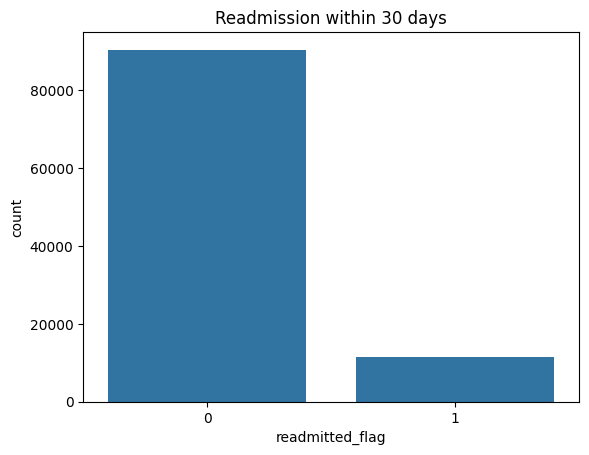

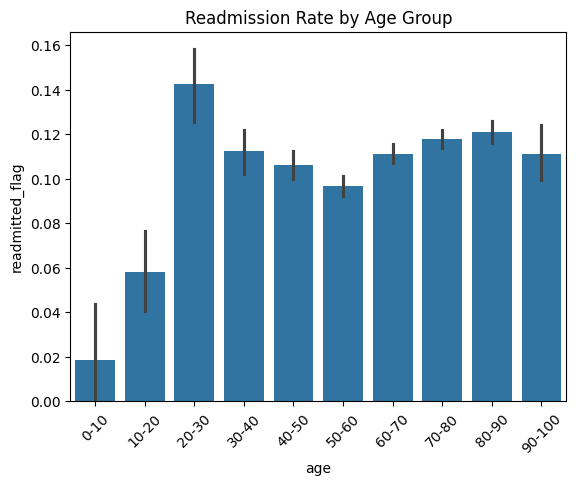

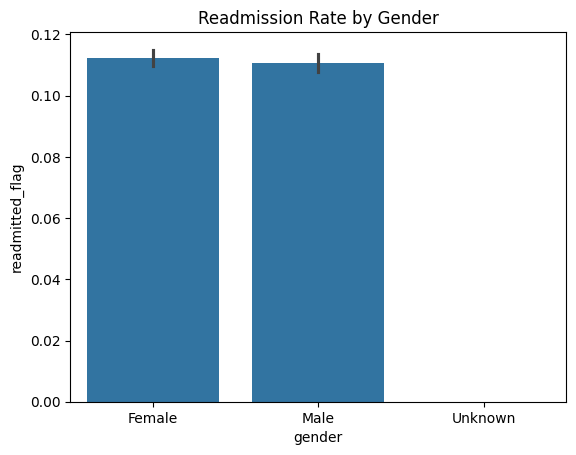

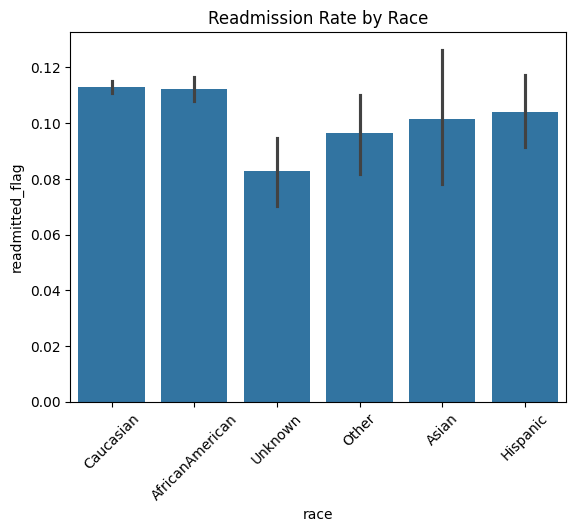

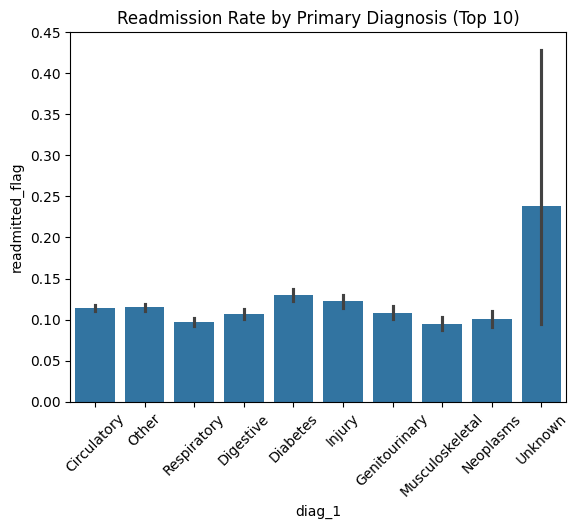

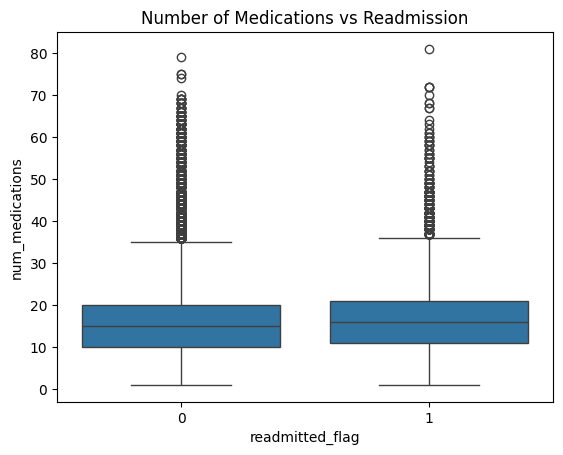

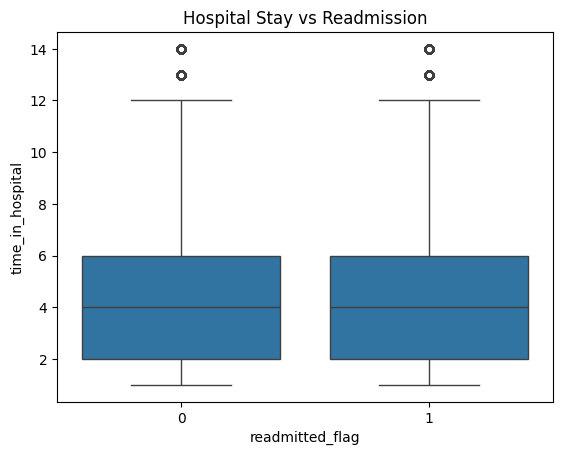

In [15]:


# Basic overview

print("Shape:", final_df.shape)
print(final_df.describe())


# Target distribution

sns.countplot(x="readmitted_flag", data=final_df)
plt.title("Readmission within 30 days")
plt.show()


# Demographics

# Age
sns.barplot(x="age", y="readmitted_flag", data=final_df)
plt.title("Readmission Rate by Age Group")
plt.xticks(rotation=45)
plt.show()

# Gender
sns.barplot(x="gender", y="readmitted_flag", data=final_df)
plt.title("Readmission Rate by Gender")
plt.show()

# Race
sns.barplot(x="race", y="readmitted_flag", data=final_df)
plt.title("Readmission Rate by Race")
plt.xticks(rotation=45)
plt.show()

# Medical Information

sns.barplot(x="diag_1", y="readmitted_flag", data=final_df,
            order=final_df['diag_1'].value_counts().index[:10])
plt.title("Readmission Rate by Primary Diagnosis (Top 10)")
plt.xticks(rotation=45)
plt.show()


# Resource Utilization
sns.boxplot(x="readmitted_flag", y="num_medications", data=final_df)
plt.title("Number of Medications vs Readmission")
plt.show()

sns.boxplot(x="readmitted_flag", y="time_in_hospital", data=final_df)
plt.title("Hospital Stay vs Readmission")
plt.show()


Exploratory Data Analysis (EDA) — Hospital Readmission
1. Readmission Distribution

Most patients were not readmitted within 30 days.

Only about 11% of encounters resulted in a readmission (readmitted_flag = 1).

--> This indicates a class imbalance problem for modeling (far more 0’s than 1’s).

2. Readmission by Age Group

Younger patients (0–20) had very low readmission rates.

The 20–30 age group showed a noticeable spike (~14%).

Middle-aged (30–60) groups were more stable (~10–11%).

Older groups (60–90) had slightly higher readmission rates (~11–12%), consistent with higher health risks in elderly populations.

3. Readmission by Gender

Male and Female patients showed almost identical readmission rates (~11%).

--> Suggests gender does not significantly affect readmission risk.

4. Readmission by Race

Caucasian and AfricanAmerican patients had similar rates (~11%).

Hispanic and Asian patients slightly lower, but small sample sizes create wider uncertainty.

Unknown race group showed the lowest rate, but likely due to missing data rather than real effect.

--> No strong race-based differences, but some imbalance in group sizes.

5. Readmission by Primary Diagnosis

Diabetes patients had a higher readmission rate (~13%).

Circulatory issues (heart, blood pressure) also showed high readmission (~12%).

Respiratory and Musculoskeletal cases had lower rates (~9–10%).

Unknown diagnosis appeared artificially high, but this is due to missing/uncoded data.

--> Confirms chronic conditions (Diabetes, Circulatory) drive higher risk.

6. Number of Medications vs Readmission

Median medication count: ~15 for both groups.

Readmitted patients had a slightly higher median number of medications.

--> Outliers: some patients had >60 medications prescribed (unusually high).

7. Time in Hospital vs Readmission

Median stay length: ~4 days for both groups.

Readmitted patients tend to have slightly longer hospital stays.

--> But distributions are very similar — hospital stay length alone is not a strong predictor.

**Key Takeaways**

Dataset is imbalanced (~11% readmitted).

Age (20–30 spike, elderly risk) and diagnosis type (Diabetes, Circulatory) are major drivers of readmission.

Gender and race show minimal differences.

Medication count and length of stay show small but meaningful differences.

Chronic conditions and complexity of care seem most tied to higher readmission.

Columns & Results to Focus on for Modeling
1. Target Variable

readmitted_flag (already defined: 1 = readmitted <30 days, 0 = otherwise).

Note: Imbalanced (~11% positives).

Handle with resampling or class weights.

2. Demographics

age → categorical bins (0–10 … 90–100).

gender → Male/Female/Unknown.

race → 6 categories (Caucasian, AfricanAmerican, Hispanic, Asian, Other, Unknown).
--> Good baseline features, but check fairness (avoid biased conclusions).

3. Visit Information

admission_type_id → categorical (map later in dbt dims).

discharge_disposition_id → categorical (map later).

admission_source_id → categorical (map later).
--> These are strong predictors — e.g., patients discharged to nursing homes are often readmitted.

4. Medical Information

diag_1, diag_2, diag_3 → mapped into 10 categories (Circulatory, Respiratory, Diabetes, etc.).

medical_specialty → grouped into 18 categories.

Focus on chronic conditions like Diabetes & Circulatory (we saw higher readmission rates).

5. Resource Utilization

time_in_hospital → numeric (range ~1–14, watch outliers).

num_lab_procedures → numeric.

num_procedures → numeric.

num_medications → numeric (outliers >60 meds).

number_outpatient, number_emergency, number_inpatient → numeric, past visit counts (very predictive).

number_diagnoses → numeric, total diagnoses recorded.

--> These columns show how intensive the care was — usually linked to higher readmission risk.

6. Lab Results

max_glu_serum → categorical (none, normal, >200, >300).

A1Cresult → categorical (none, normal, >7, >8).
--> Important for diabetes management — high values often mean unstable patients.

7. Medications

All drug columns (metformin, insulin, etc.) standardized to 4 categories: no, steady, up, down.

change → yes/no (whether any med was changed).

diabetesMed → yes/no (if patient was given diabetes meds).

--> Especially insulin usage + changes in meds are strong predictors.

8. Other Key Notes

Outliers to monitor:

- num_medications (>60)

- num_lab_procedures (>100)

- time_in_hospital (>14 days)

- Class imbalance: target = 11% positive cases.

- Bias check: race and gender might not add predictive power, but we need to check fairness.



In [16]:
import pandas as pd
import os, shutil
from datetime import datetime, timedelta
import glob

# Load the cleaned dataset
df = pd.read_csv("clean_diabetic_data.csv")

# Reset output folder
if os.path.exists("data/daily_chunks"):
    shutil.rmtree("data/daily_chunks")
os.makedirs("data/daily_chunks", exist_ok=True)

# Number of splits
num_files = 8
chunk_size = len(df) // num_files   # base chunk size

# Starting date
start_date = datetime(2025, 8, 24)

# Split loop
for day in range(num_files):
    start_idx = day * chunk_size
    end_idx = (day + 1) * chunk_size if day < num_files - 1 else len(df)  # last file takes remainder
    chunk = df.iloc[start_idx:end_idx]

    current_date = start_date + timedelta(days=day)
    filename = f"data/daily_chunks/{current_date.strftime('%Y-%m-%d')}.csv"
    chunk.to_csv(filename, index=False)

    print(f"Created {filename} with {len(chunk)} rows")

print("Done! Exactly 8 files created.")

# Validation
files = sorted(glob.glob("data/daily_chunks/*.csv"))
print("Number of files created:", len(files))

total_rows = sum(pd.read_csv(f).shape[0] for f in files)
print("Total rows across all files:", total_rows)


Created data/daily_chunks/2025-08-24.csv with 12720 rows
Created data/daily_chunks/2025-08-25.csv with 12720 rows
Created data/daily_chunks/2025-08-26.csv with 12720 rows
Created data/daily_chunks/2025-08-27.csv with 12720 rows
Created data/daily_chunks/2025-08-28.csv with 12720 rows
Created data/daily_chunks/2025-08-29.csv with 12720 rows
Created data/daily_chunks/2025-08-30.csv with 12720 rows
Created data/daily_chunks/2025-08-31.csv with 12726 rows
Done! Exactly 8 files created.
Number of files created: 8
Total rows across all files: 101766


In [17]:
import shutil

# Zip the daily_chunks folder
shutil.make_archive("daily_chunks", 'zip', "data/daily_chunks")
print("Created daily_chunks.zip")


Created daily_chunks.zip


In [18]:
from google.colab import files

# Download the zip
files.download("daily_chunks.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
!pip install snowflake-connector-python==3.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.4/479.4 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 2.0.0
    Uninstalling cffi-2.0.0:
      Successfully uninstalled cffi-2.0.0
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3


In [21]:
import snowflake.connector
import os

# Snowflake credentials
conn = snowflake.connector.connect(
    user="SRITV",
    password="Pw",
    account="nib97747.us-west-2",   # e.g. xy12345.us-east-1
    warehouse="COMPUTE_WH",
    database="HOSPITAL_DB",
    schema="RAW",
    role="HOSPITAL_ROLE",
    insecure_mode=True
)

cur = conn.cursor()

# Path to one of your split files in Colab
local_file = "diabetic_data.csv"

# Upload to Snowflake Stage
cur.execute(f"""
    PUT file://{local_file} @HOSPITAL_STAGE
    AUTO_COMPRESS=TRUE
    OVERWRITE=TRUE
""")

print("File uploaded successfully!")

cur.close()
conn.close()

File uploaded successfully!
